In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.use('default')
plt.rc('font', size=18)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['legend.loc'] = "upper left"

In [4]:
hardwares = ['12CPU_30RAM', '8CPU_20RAM']

In [5]:
dataToPlot = ['cpuUsage', 'memoryUsage']
folders = ['10800s']

In [47]:
#tests = ['2repl', '4repl', '5repl', '6repl']

In [22]:
tests = ['trans_60s', 'trans_120s', 'trans_180s', 'trans_240s', 'trans_300s']

In [36]:
#tests = ['req_250ms', 'req_500ms', 'req_1000ms', 'req_2000ms']

In [6]:
#tests = ['A1_100-A2_100-A3_100', 'A1_200-A3_100', 'A2_200', 'A2_200-A3_100', 'A3_200']

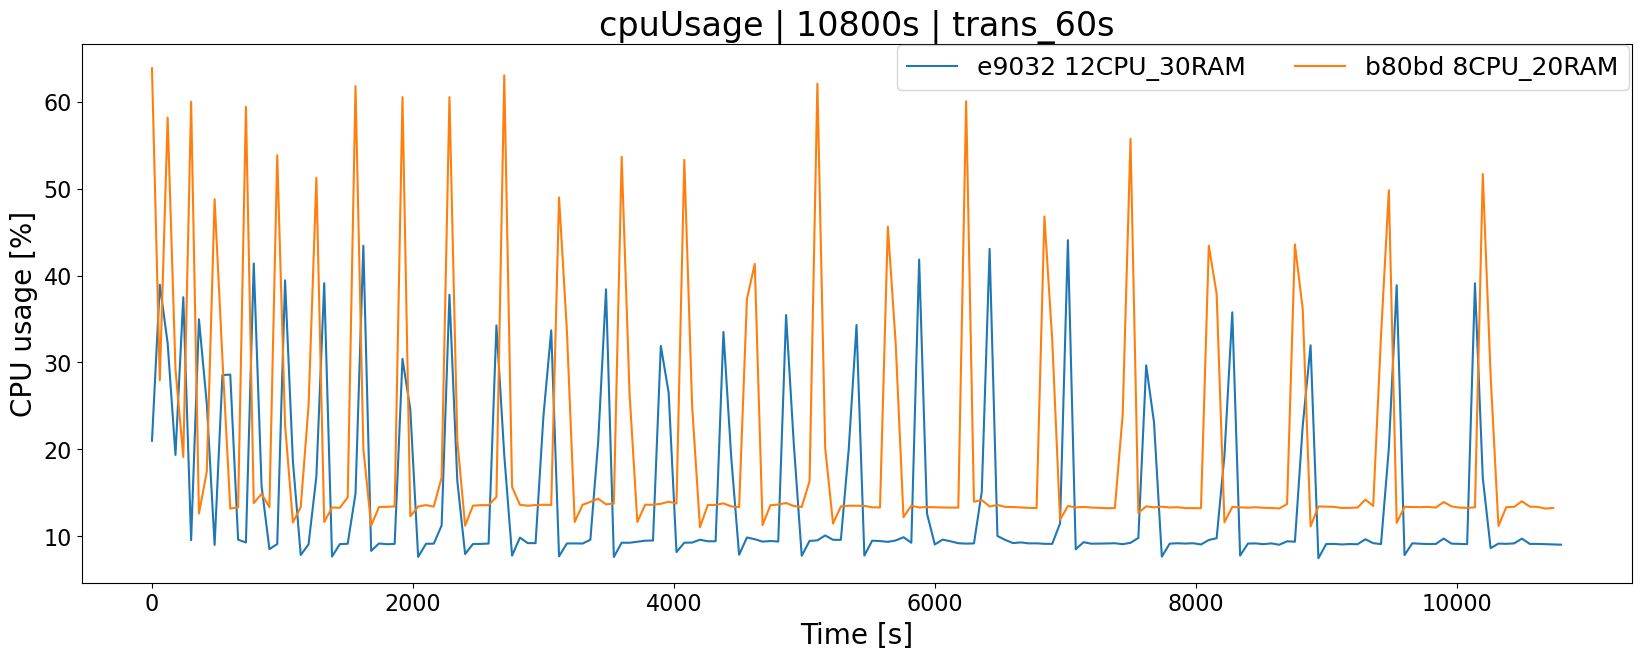

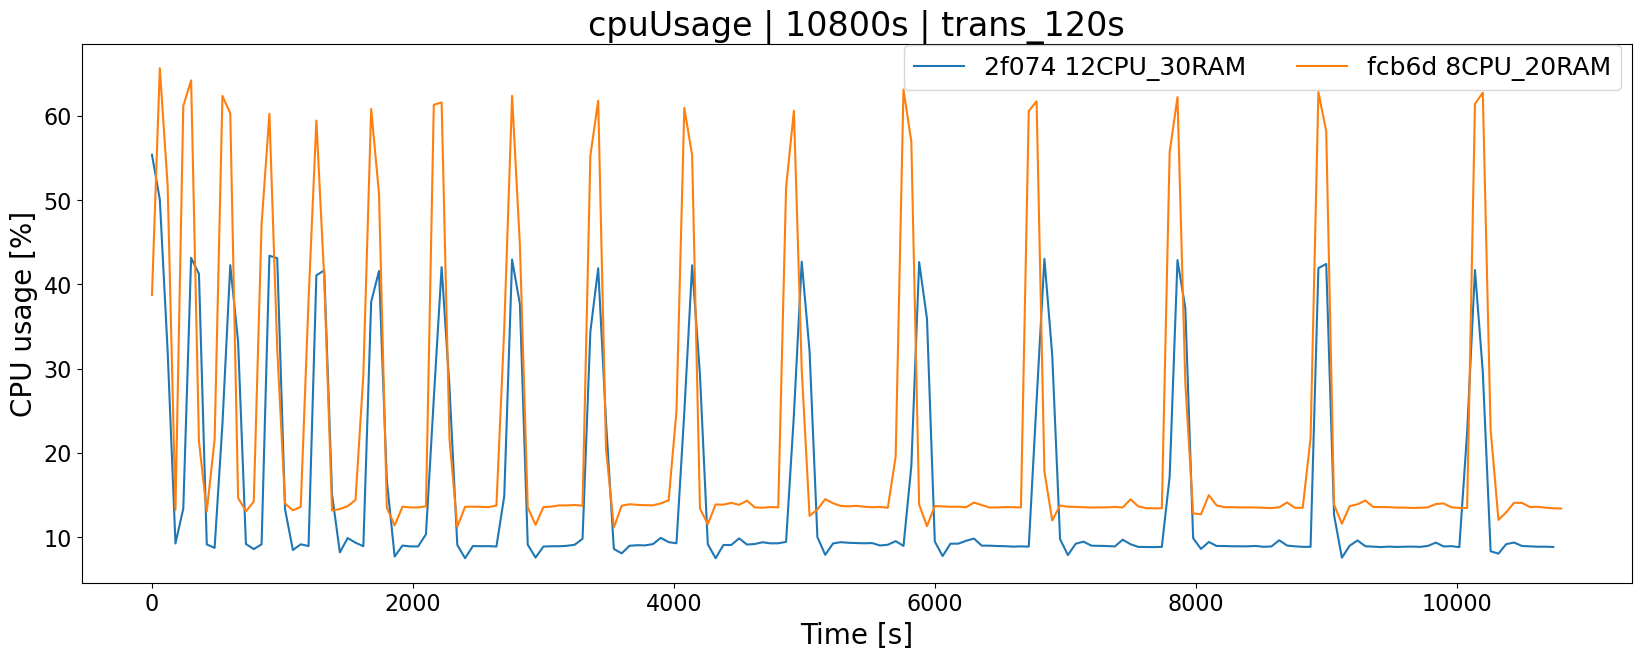

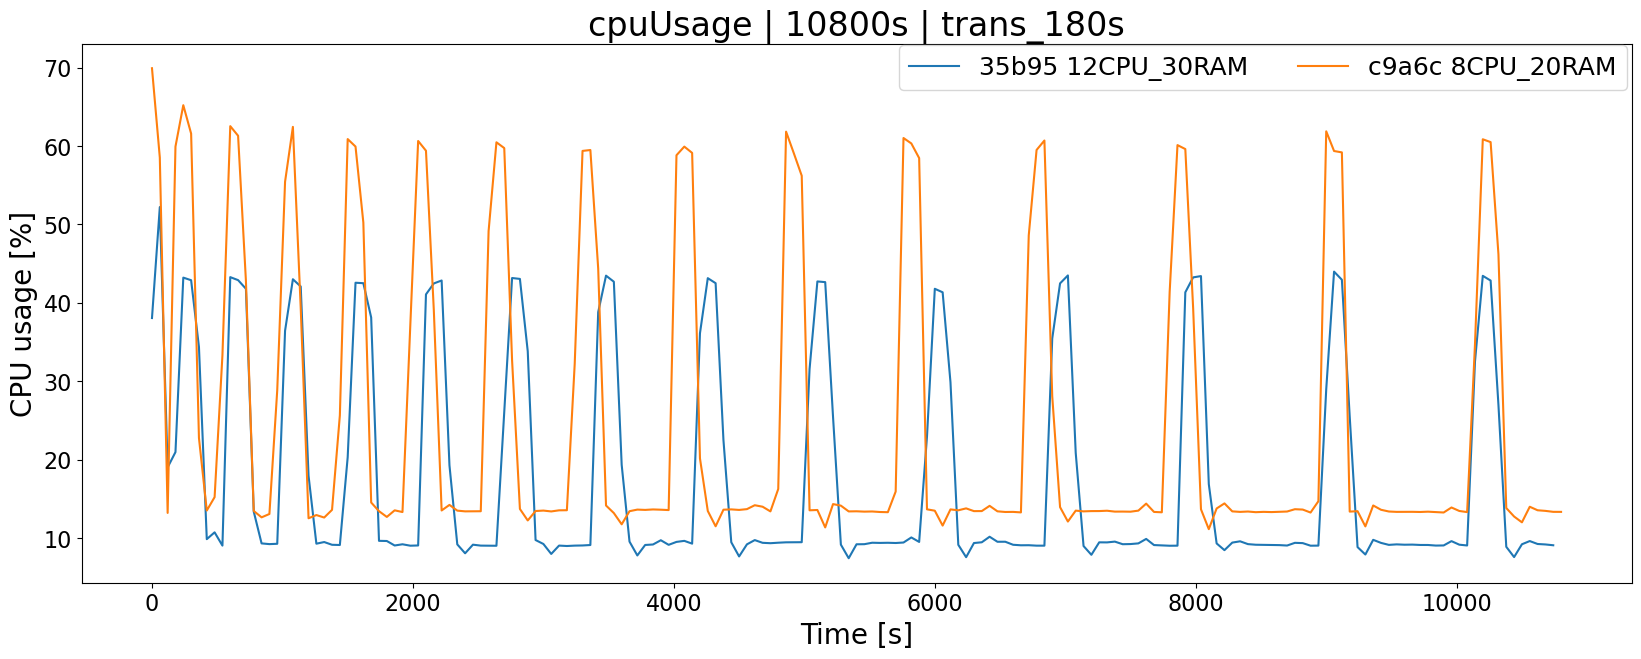

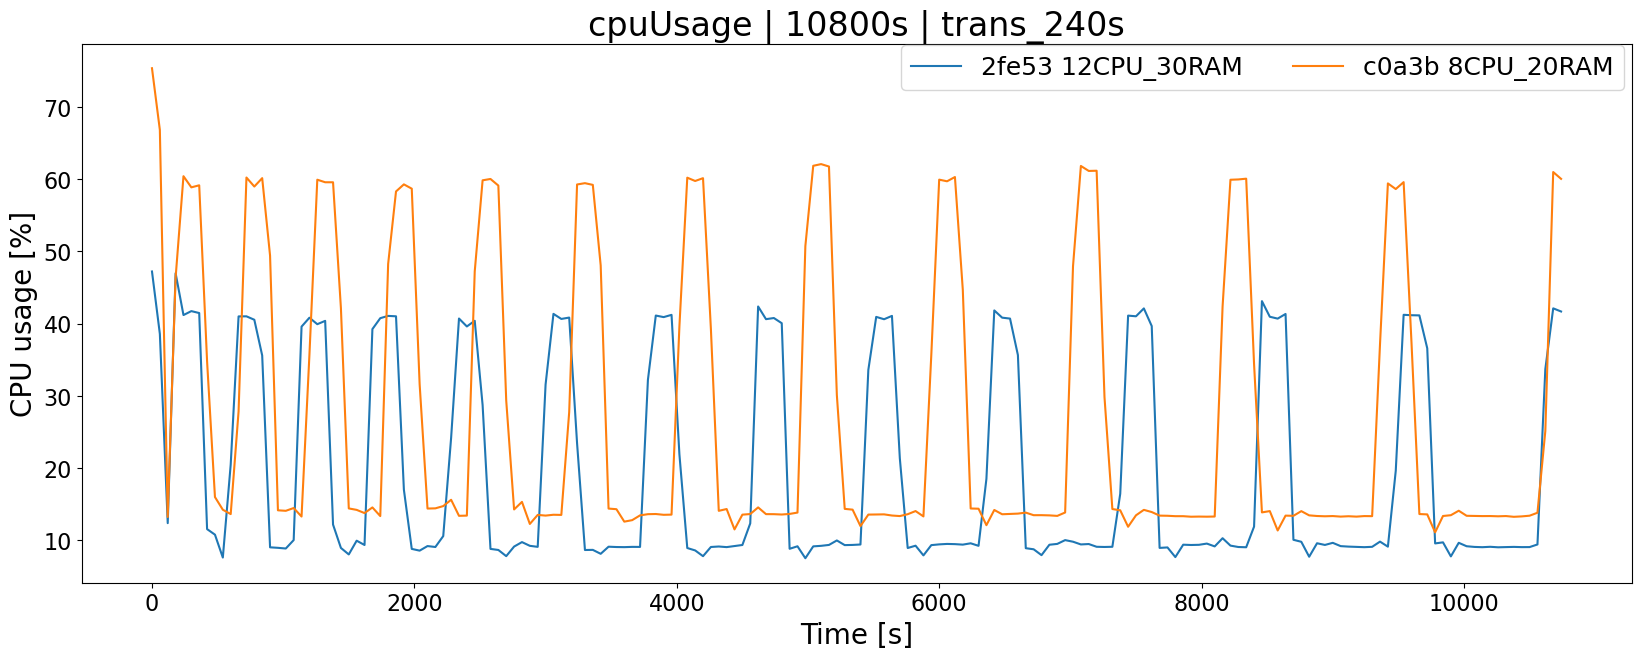

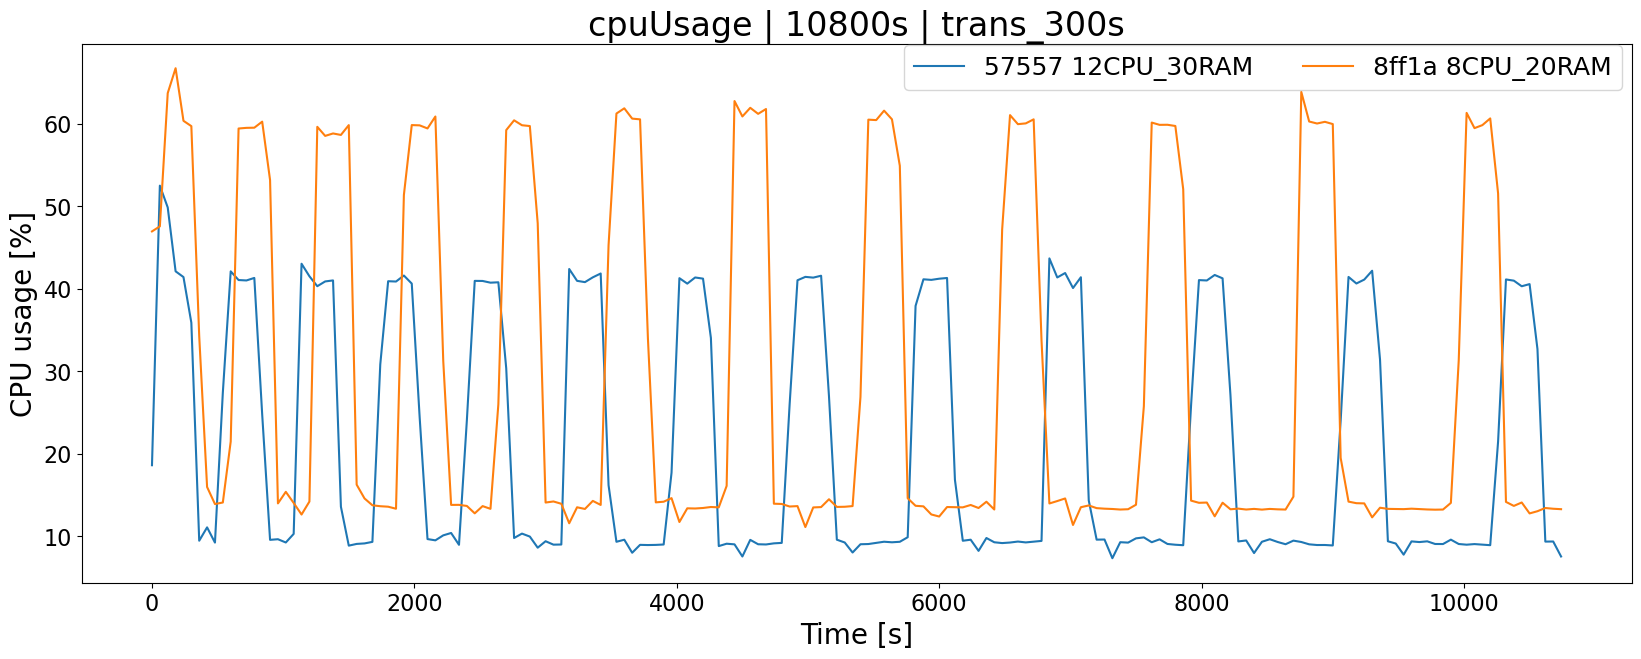

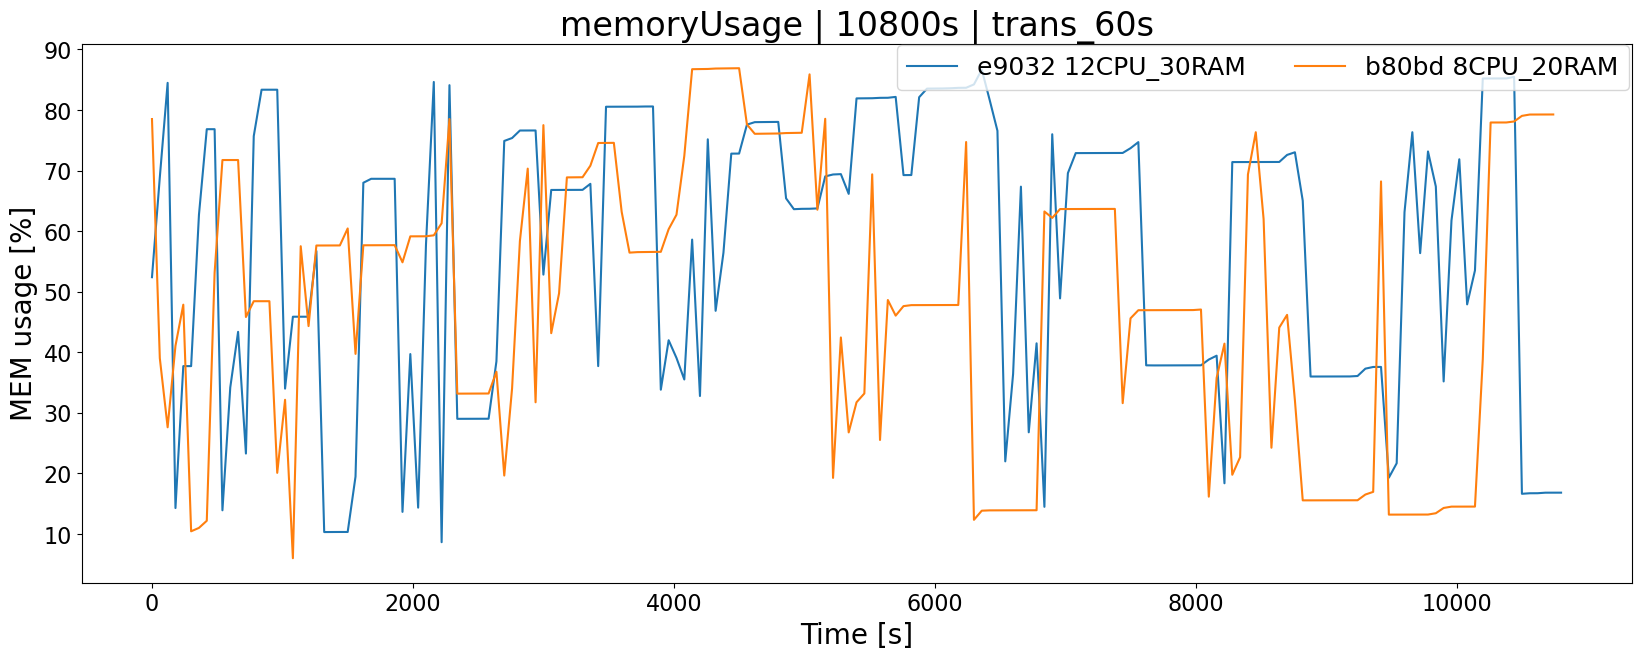

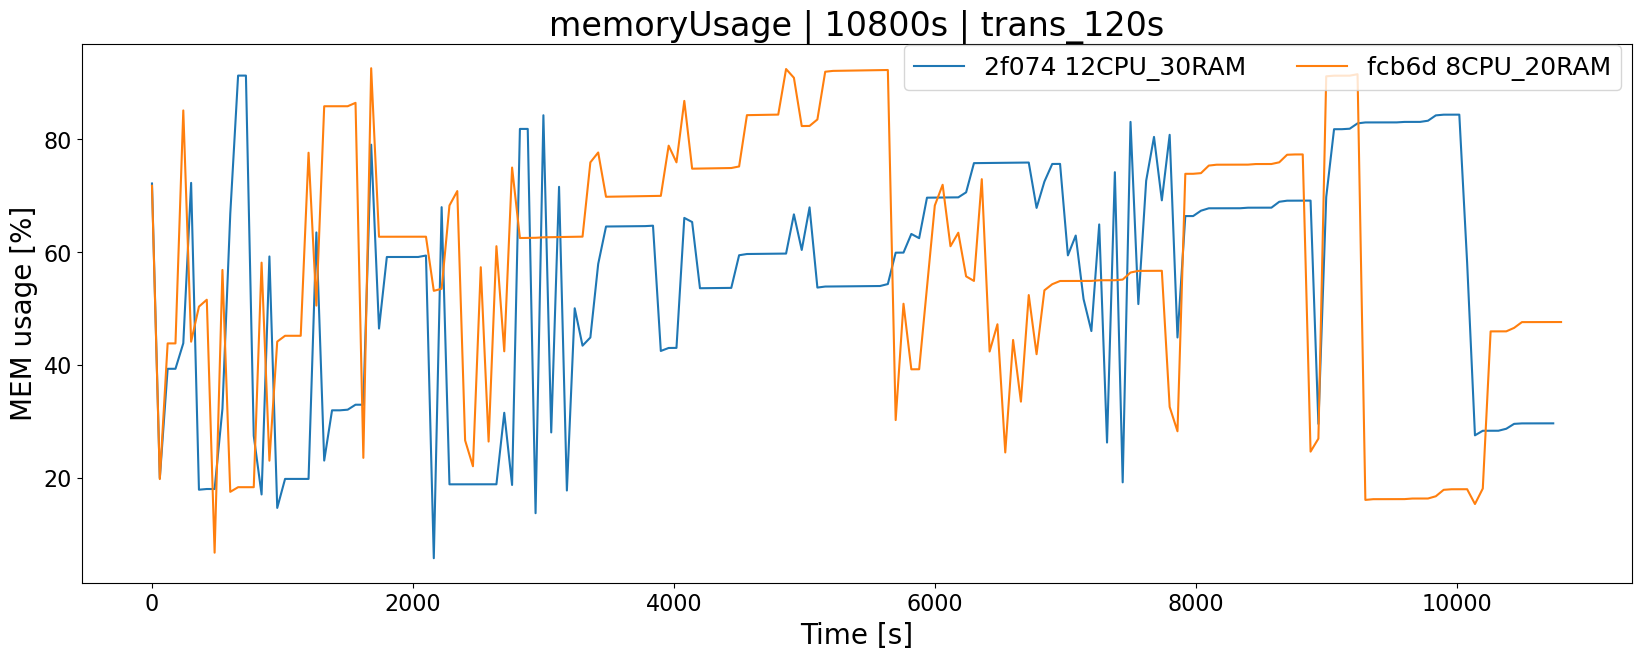

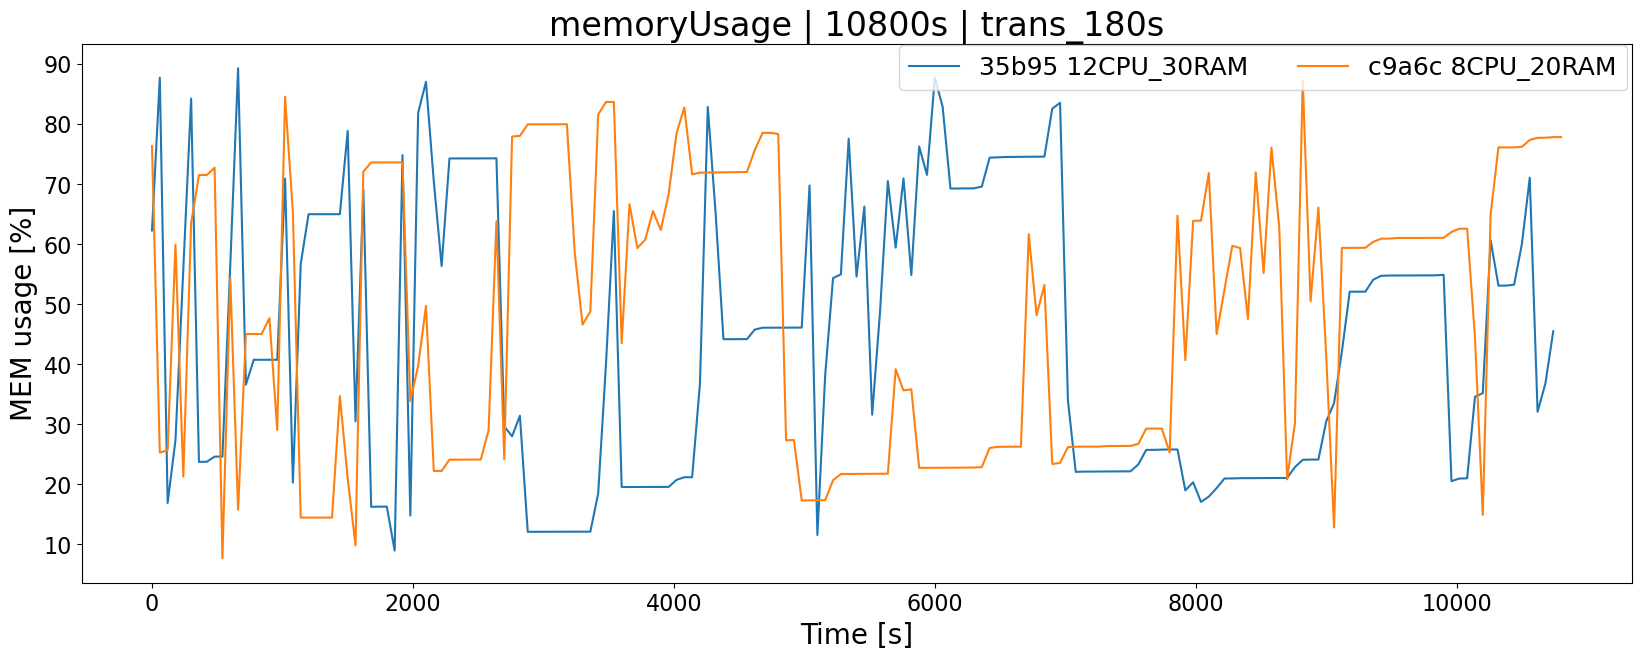

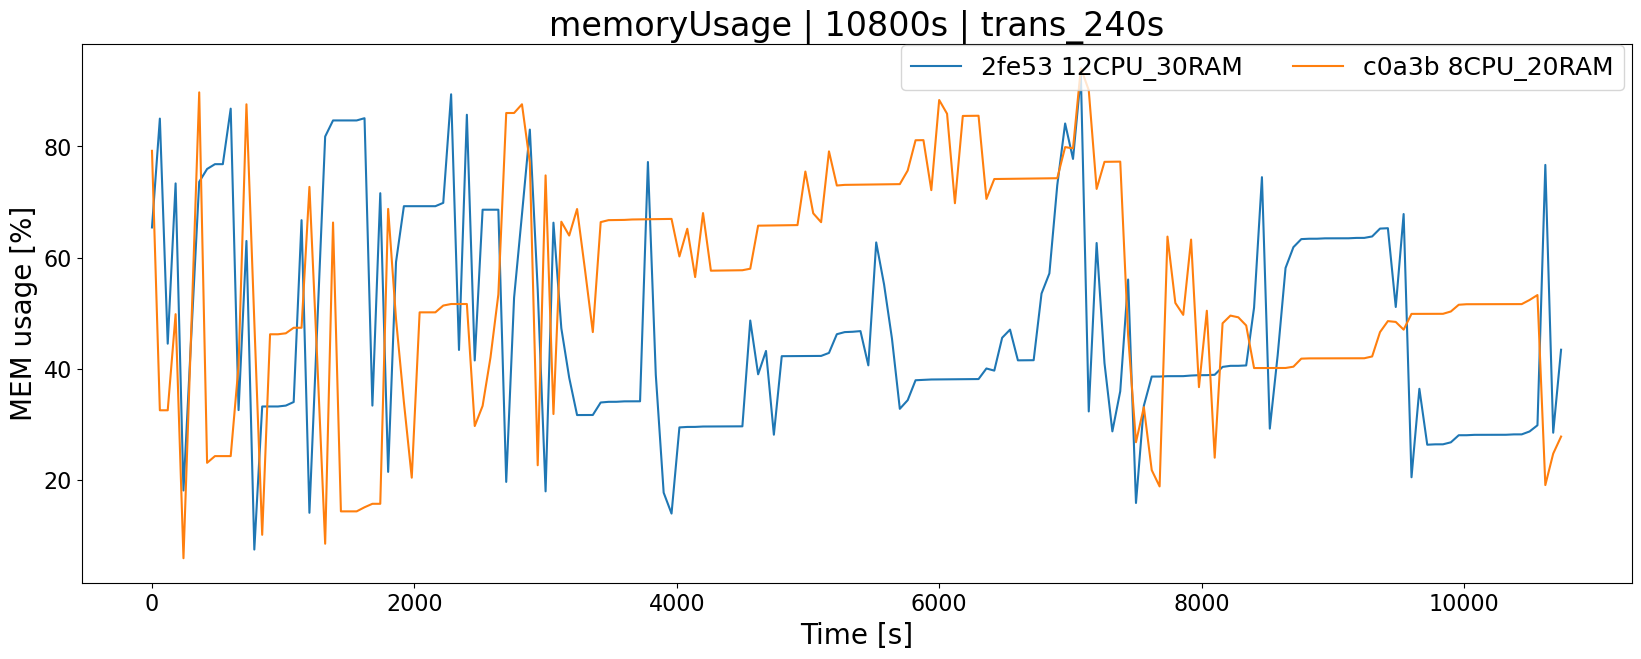

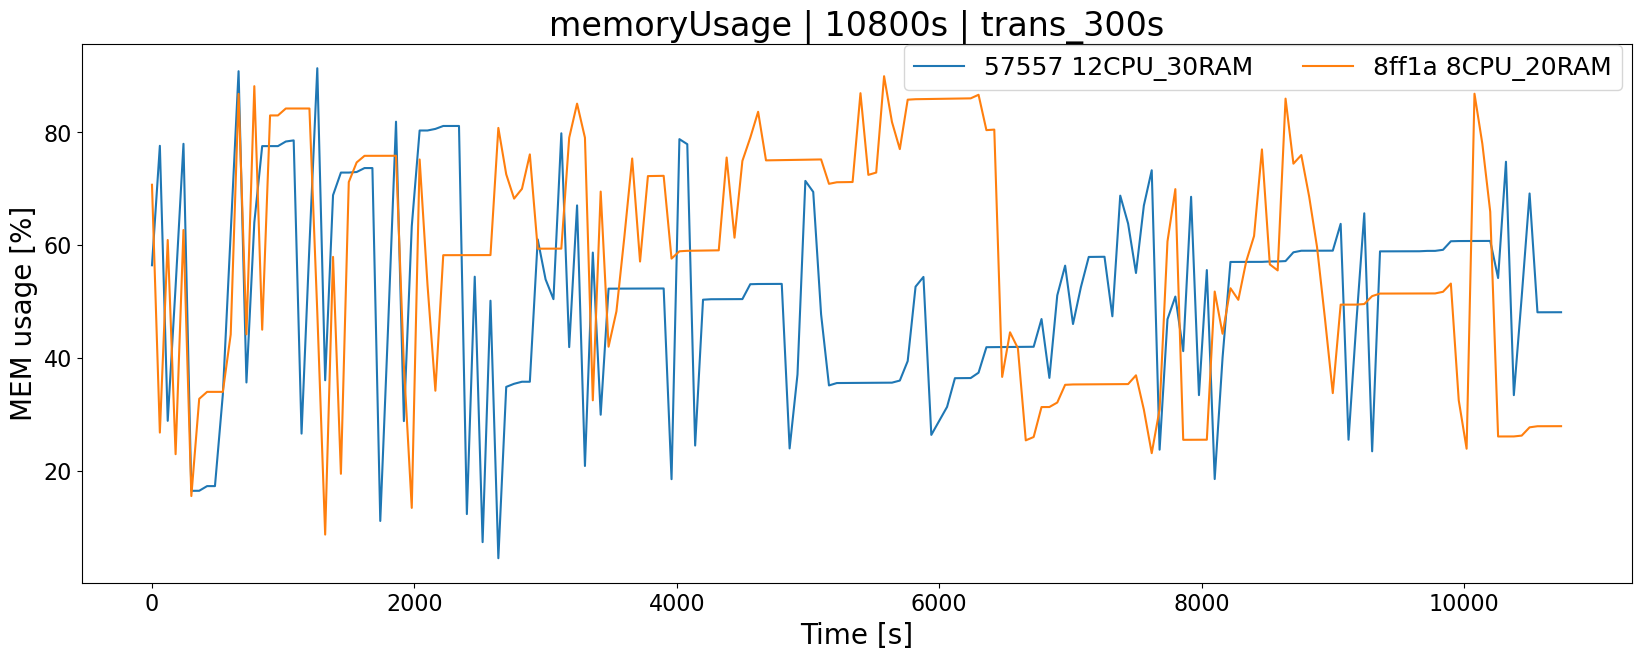

In [23]:
for f in folders:
    for j in dataToPlot:
        for i in tests:
            data = pd.DataFrame()
            try:
                for h in hardwares:

                    replicas = pd.read_csv(h + '/' + f + '/' + i + '/stock.csv', usecols=['replicaId']).replicaId.unique().tolist()

                    q = replicas[0][0:5:1] + ' ' + h
                    try:
                        d = pd.read_csv(h + '/' + f + '/' + i + '/stock.csv', usecols=['timestamp', j, 'replicaId'])
                    except:
                        continue
                    d = d.sort_values(by=['timestamp'])
                    t = d['timestamp'][0]
                    d['Time [s]'] = d['timestamp'].apply(lambda x: (x - t)/1000)
                    d[j] = d[j].apply(lambda x: x*100)
                    d = d[(d['replicaId'] == replicas[0])]

                    customDataFrame = pd.DataFrame({'Time [s]': d['Time [s]'], q: d[j]})
                    customDataFrame = customDataFrame.loc[customDataFrame['Time [s]'] < int(f[:-1])]

                    data = pd.concat([data, customDataFrame])
                ax = data.set_index('Time [s]').plot(figsize=(20, 7), title = j + ' | ' + f + ' | ' + i)
                ax.set_xlabel("Time [s]")
                ax.set_ylabel("CPU usage [%]") if j == "cpuUsage" else ax.set_ylabel("MEM usage [%]")
                ax.legend(loc='upper center', bbox_to_anchor=(0.762, 1.02),
                          ncol=5)

            except:
                continue